https://www.kaggle.com/c/house-prices-advanced-regression-techniques


**Kaggle API ile Veri Kümesi İndirme**

Kaggle pip paketi kurulumu

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=3f627b6dfde33b33304671cccbdde44d0242c61dc858b32c91f2763cc58a6a3a
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


API erişimi için token bilgisini yükleme

In [2]:
from google.colab import files
files.upload() #upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


"house-prices-advanced-regression-techniques" veri kümesini API ile indirelim

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 47.7MB/s]


İndirilen veri kümesini dosyalarını .zip'ten çıkartalım

In [4]:
!unzip -q house-prices-advanced-regression-techniques.zip -d .
!ls

data_description.txt				 sample_submission.csv
house-prices-advanced-regression-techniques.zip  test.csv
kaggle.json					 train.csv
sample_data


## ÖRNEK - Ev satış fiyatlarını özelliklerine göre tahmin etmeye çalışalım

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Eğitim veri kümesini dosyadan yükleyelim

In [6]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Veri kümesi içerisindeki özelliklerin açıklamaları

* SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.
* MSSubClass: İnşaat sınıfı
* MSZoning: Genel imar sınıflandırması
* LotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması
* LotArea: Parsel büyüklüğü
* Street: Yol erişiminin tipi
* Alley: Sokak girişi tipi
* LotShape: Mülkün genel şekli
* LandContour: Mülkün düzlüğü
* Utulities: Mevcut hizmetlerin türü
* LotConfig: Parsel yapılandırması
* LandSlope: Mülkün eğimi
* Neighborhood: Ames şehir sınırları içindeki fiziksel konumu
* Condition1: Ana yol veya tren yoluna yakınlık
* Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)
* BldgType: Konut tipi
* HouseStyle: Konut sitili
* OverallQual: Genel malzeme ve bitiş kalitesi
* OverallCond: Genel durum değerlendirmesi
* YearBuilt: Orijinal yapım tarihi
* YearRemodAdd: Yeniden düzenleme tarihi
* RoofStyle: Çatı tipi
* RoofMatl: Çatı malzemesi
* Exterior1st: Evdeki dış kaplama
* Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
* MasVnrType: Duvar kaplama türü
* MasVnrArea: Kare ayaklı duvar kaplama alanı
* ExterQual: Dış malzeme kalitesi
* ExterCond: Malzemenin dışta mevcut durumu
* Foundation: Vakıf tipi
* BsmtQual: Bodrumun yüksekliği
* BsmtCond: Bodrum katının genel durumu
* BsmtExposure: Yürüyüş veya bahçe katı bodrum duvarları
* BsmtFinType1: Bodrum bitmiş alanının kalitesi
* BsmtFinSF1: Tip 1 bitmiş alanın metre karesi
* BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
* BsmtFinSF2: Tip 2 bitmiş alanın metre karesi
* BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
* TotalBsmtSF: Bodrum alanının toplam metre karesi
* Heating: Isıtma tipi
* HeatingQC: Isıtma kalitesi ve durumu
* CentralAir: Merkezi klima
* Electrical: elektrik sistemi
* 1stFlrSF: Birinci Kat metre kare alanı
* 2ndFlrSF: İkinci kat metre kare alanı
* LowQualFinSF: Düşük kaliteli bitmiş alanlar (tüm katlar)
* GrLivArea: Üstü (zemin) oturma alanı metre karesi
* BsmtFullBath: Bodrum katındaki tam banyolar
* BsmtHalfBath: Bodrum katındaki yarım banyolar
* FullBath: Üst katlardaki tam banyolar
* HalfBath: Üst katlardaki yarım banyolar
* BedroomAbvGr: Bodrum seviyesinin üstünde yatak odası sayısı
* KitchenAbvGr: Bodrum seviyesinin üstünde mutfak Sayısı
* KitchenQual: Mutfak kalitesi
* TotRmsAbvGrd: Üst katlardaki toplam oda (banyo içermez)
* Functional: Ev işlevselliği değerlendirmesi
* Fireplaces: Şömineler
* FireplaceQu: Şömine kalitesi
* Garage Türü: Garaj yeri
* GarageYrBlt: Garajın yapım yılı
* GarageFinish: Garajın iç yüzeyi
* GarageCars: Araç kapasitesi
* GarageArea: Garajın alanı
* GarageQual: Garaj kalitesi
* GarageCond: Garaj durumu
* PavedDrive: Garajla yol arasındaki yol
* WoodDeckSF: Ayaklı ahşap güverte alanı
* OpenPorchSF: Kapı önündeki açık veranda alanı
* EnclosedPorch: Kapı önündeki kapalı veranda alan
* 3SsPorch: Üç mevsim veranda alanı
* ScreenPorch: Veranda örtü alanı
* PoolArea: Havuzun metre kare alanı
* PoolQC: Havuz kalitesi
* Fence: Çit kalitesi
* MiscFeature: Diğer kategorilerde bulunmayan özellikler
* MiscVal: Çeşitli özelliklerin değeri
* MoSold: Satıldığı ay
* YrSold: Satıldığı yıl
* SaleType: Satış Türü
* SaleCondition: Satış Durumu


Eğitim veri setimizin kaç gözlem ve kaç özellikten oluştuğunu kontrol edelim.

In [7]:
df_train.shape

(1460, 81)

Satış fiyatlarını dağılımını inceleyelim

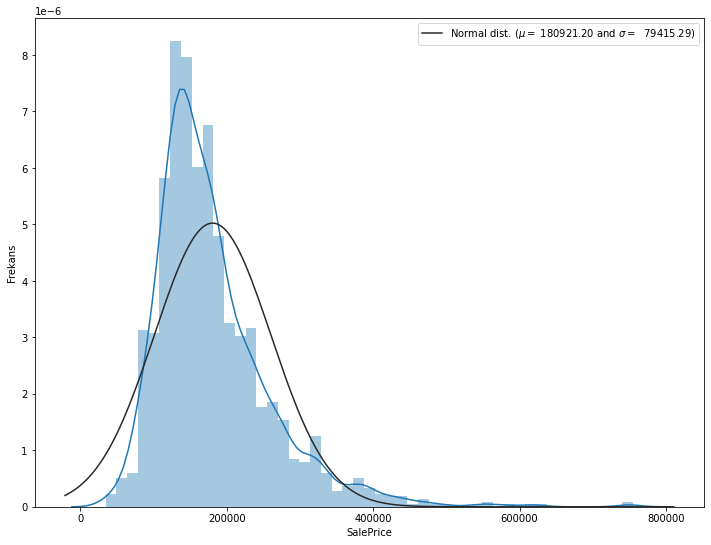

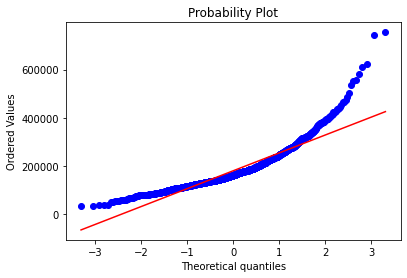

In [8]:
plt.subplots(figsize=(12, 9))
sns.distplot(df_train['SalePrice'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

#Şimdi oluşturduğumuz dağılımı çizdirelim.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {: .2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frekans')

#Olasılık durumunuda çizdirelim
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

**log fonksiyonundan faydalanarak hedef değişkenimiz olan 'SalePrice''ın daha normal bir dağılım olarak dönüştürelim.**

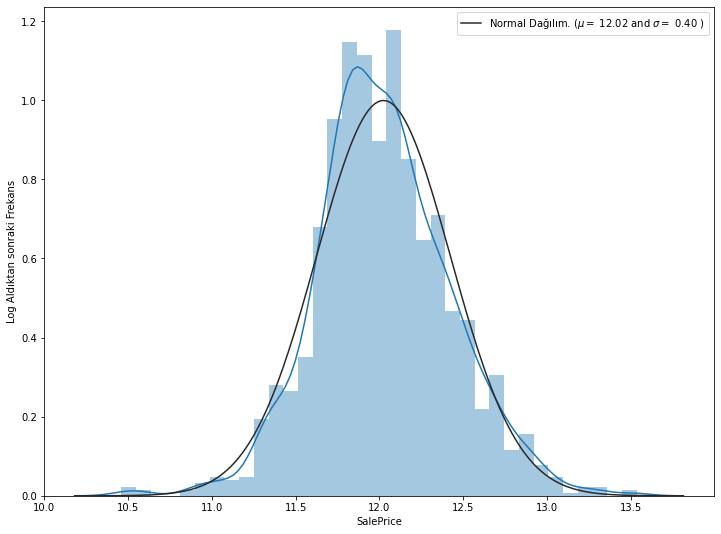

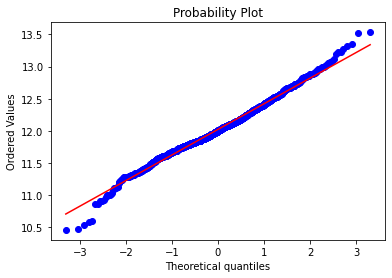

In [9]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

plt.subplots(figsize =(12, 9))
sns.distplot(df_train['SalePrice'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

#Şimdi dağılımı görselleştirelim
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunu görselleştirelim
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

### Eğitim veri kümesi içerisinde bulunan özellikler arasındaki korelasyona bir göz atalım.

In [10]:
#Verilerimizin içerisinden sadece sayısal verisetini ayıralım.
train_corr = df_train.select_dtypes(include = [np.number])

train_corr.shape

(1460, 38)

In [11]:
#Sayısal veriler içerisindeki Id kolonu bize korelasyon ilişkisi hakkında bir bilgi vermeyeceğinden silelim.
del train_corr['Id']

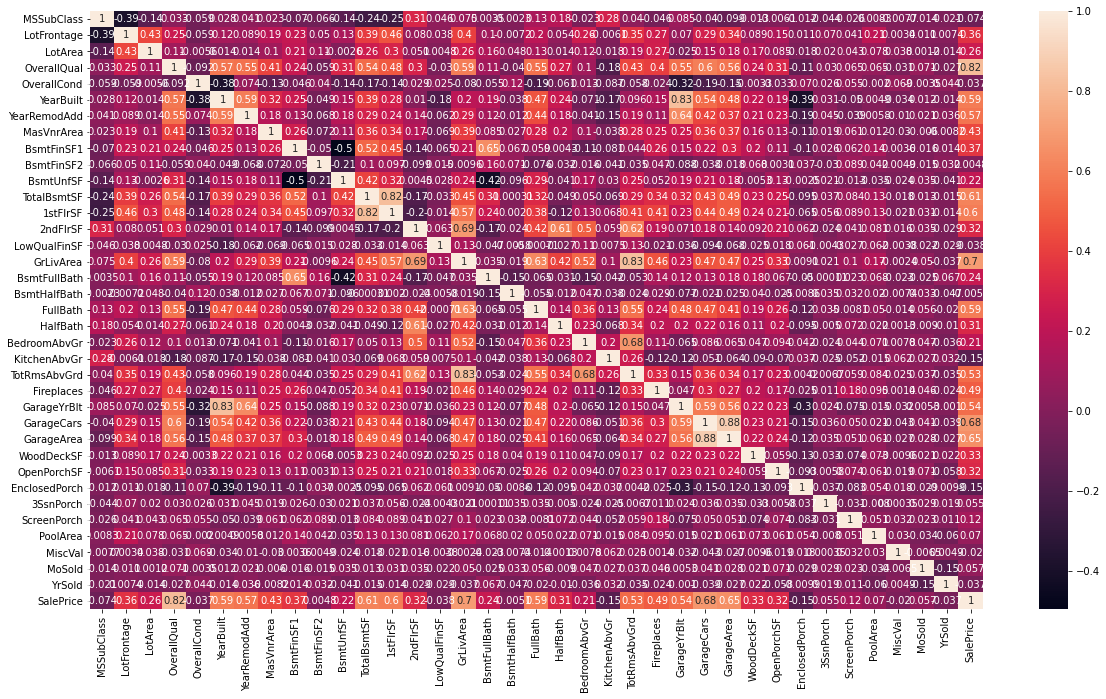

In [12]:
#Korelasyon grafiğimizi çizebiliriz.
corr = train_corr.corr()
plt.subplots(figsize = (20, 11))
sns.heatmap(corr, annot = True)

Kolerasyon matrisi bize hangi özelliklerin birbirleri ile ilişkisi olduğunu gösteriyor.

Bu kolere ilişkilerden bize en çok bilgi verenleri görmek içn %50 üzerindekileri görselleştirelim

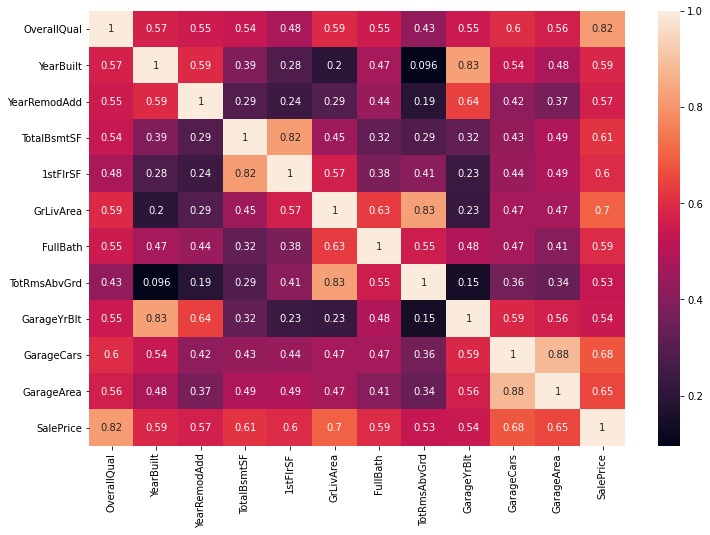

In [13]:
best_50_corr = corr.index[abs(corr['SalePrice'] > 0.5)]
plt.subplots(figsize = (12, 8))
best_corr = df_train[best_50_corr].corr()
sns.heatmap(best_corr, annot = True)
plt.show()

**SalePrice(Satış Fiyatı)** ile ilgili en iyi ilişki içerisinde olan özellik %82lik oran ile **OverallQual** özelliği olduğu anlaşılıyor.

In [14]:
#OverallQual özelliğindeki benzersiz değerlere bakalım
df_train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

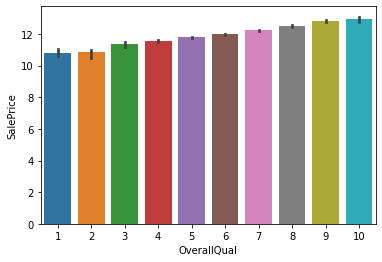

In [15]:
#Bu değerlerı bir çubuk grafiğinde görelim
sns.barplot(df_train.OverallQual, df_train.SalePrice)

Hedef değişken(SalePrice) ile diğer değerlerin ilişkilerini aşağıdaki şekilde de görebiliriz.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


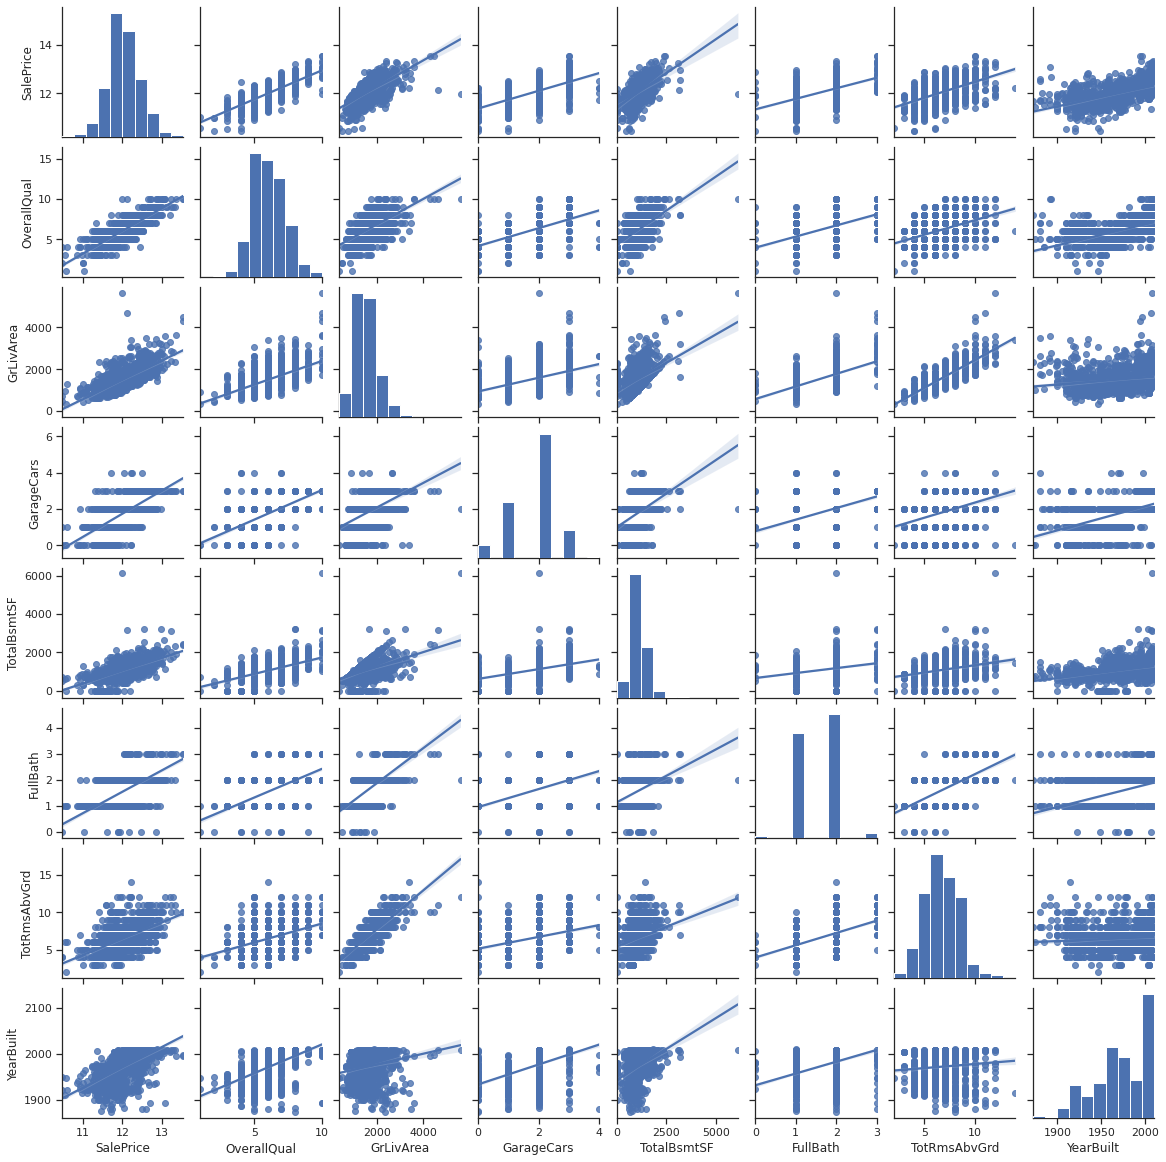

In [16]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style = 'ticks')
sns.pairplot(df_train[col], size = 2, kind = 'reg')

In [17]:
print('Hedef değişken(SalePrice) ile en iyi ilişkisi olan değişkeni bulalım')
corr = df_train.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)

corr.SalePrice

Hedef değişken(SalePrice) ile en iyi ilişkisi olan değişkeni bulalım


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

Burada yine OverallQual ile kolerasyonu görülüyor.



### Ön İşlemler
Eksik verileri bulalım.

In [18]:
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Her bir sütundaki bu eksik değerlerin ne kadar olduklarını yüzdelik olarak yazdıralım

In [19]:
Isnull = df_train.isnull().sum() / len(df_train) * 100
Isnull = Isnull[Isnull > 0]
Isnull.sort_values(inplace = True, ascending = False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Eksik Verileri Görselleştirme

In [20]:
#Önce verileri dönüştürelim
Isnull = Isnull.to_frame()

#Her bir sütundaki değerlerin sayısını alalım
Isnull.columns = ['count']

Isnull.index.names = ['Names']

Isnull['Name'] = Isnull.index

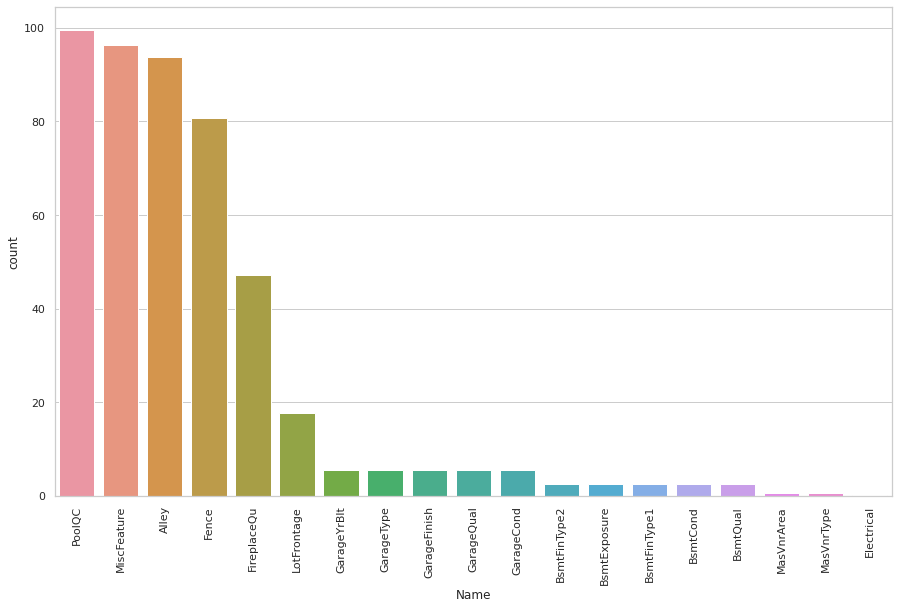

In [21]:
#Artık görselleştirelim değil mi 
plt.figure(figsize = (15, 9))
sns.set(style = 'whitegrid')
sns.barplot(x = 'Name', y = 'count', data = Isnull)
plt.xticks(rotation = 90)
plt.show()

#### Eksik veriler üzerine işlemler

In [22]:
#Mesela PoolQC değeri yaklaşık %99 boş veriden oluşuyor  bunu None olarak dolduralım
df_train['PoolQC'] = df_train['PoolQC'].fillna('None')

In [23]:
#Özellikler içinde % 50 civarında eksik değer içierenleri None ile dolduralım
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')
df_train['Alley'] = df_train['Alley'].fillna('None')
df_train['Fence'] = df_train['Fence'].fillna('None')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')

In [24]:
# Mahalleye göre gruplandıralım ve tüm değerleri medyan LotFrontage ile eksik değeri doldurun
df_train['LotFrontage'] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [25]:
#GarageType, GarageFinish, GarageQual ve GarageCond kolonlarını da None ile değiştirelim
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_train[col] = df_train[col].fillna('None')

In [26]:
#GarageYrBlt, GarageArea ve GarageCars değerlerini de sıfır ile değiştirelim
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df_train[col] = df_train[col].fillna(int(0))

In [27]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual değerlerini de None ile değiştirelim
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df_train[col] = df_train[col].fillna('None')

In [28]:
#MasVnrArea'yı da sıfır ile değiştirelim 
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(int(0))

In [33]:
#MasVnrType  sütununu da None ile değiştirelim
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [29]:
#Mode Değerlerini ekleyelim
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical']).mode()[0]

In [30]:
#Utilities'e de ihtiyacımız olmadığından çıkartalım
df_train = df_train.drop(['Utilities'], axis =1)

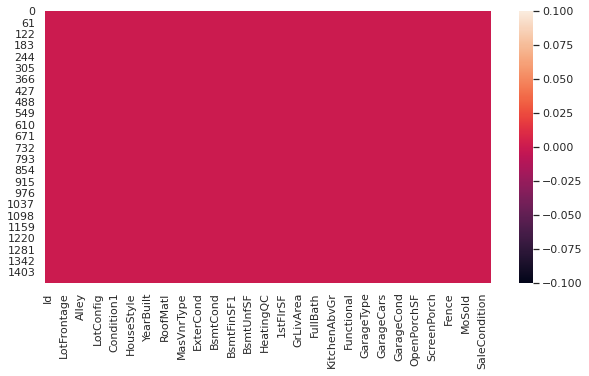

In [35]:
#Değişikler sonrası veri kümemiz null değerler içeriyor mu diye bakalım
plt.figure(figsize =(10, 5))
sns.heatmap(df_train.isnull())

In [36]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

String olan kolon isimlerini sırasıyla int olarak dönüştürelim (**Encoding str to int**)

In [37]:
from sklearn.preprocessing import LabelEncoder

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[c].values))
    df_train[c] = lbl.transform(list(df_train[c].values))

In [38]:
#Hedef değişkenimiz olan SalePrice değişkenini yeni bir değişkene yani y'ye atayarak başlayalım
y = df_train['SalePrice']

In [39]:
#Tahmin edeceğiimiz hedef değişkeni artık veri setimizden sile biliriz
del df_train['SalePrice']

In [40]:
#X ve Y değerlerini belirleyelim
X = df_train.values
y = y.values

Eğitim veri kümemizi eğitim/test olarak ayıralım

In [42]:
#Şimdi de verilerimizi eğitim ve test verileri olmak üzere ikiye ayıralım (%80 eğitim, % 20 test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### Doğrusal Regresyon

In [43]:
#Modeli önce eğitelim
from sklearn import linear_model
model = linear_model.LinearRegression()

In [44]:
#Eğittiğimiz modele verilerimizi uygulayalım
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Şimdi de eğittiğimiz modelimiz üzerinden tahminler yapalım
print("Tahmin edilen değer : " + str(model.predict([X_test[142]])))
print("Gerçek değer : " + str(y_test[142]))

Tahmin edilen değer : [11.62221633]
Gerçek değer : 11.767187766223199


In [46]:
#Bakalım ne kadar doğrulukla tahmin yapabilmişiz
print("Doğruluk oranı :  ", model.score(X_test, y_test)* 100)

Doğruluk oranı :   89.26708677161454


### Rastgele Orman Regresyonu(RandomForestRegression)

In [47]:
#Modeli Eğitelim yine
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000)

In [48]:
#Şimdi veri setimizi model uygulayalım
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
#Modelimizin doğruluğunu kontrol edelim
print("Doğruluk oranı :", model.score(X_test, y_test)*100)

Doğruluk oranı : 89.3885298080263


### GradientBoostingRegressor


In [50]:
#Son kez modelimizi eğitelim
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators = 100, max_depth = 4)

In [51]:
#Eğittiğimiz modele eğitim verilerimizi  uygulayalım
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
#Doğruluk oranımızı da kontrol edelim son olarak
print('Doğruluk Oranı: ', GBR.score(X_test, y_test)*100)

Doğruluk Oranı:  91.71164480582006


+- %10  yanılma payı ile evlerin satış fiyatını tahmin edebilen bir modelimiz oldu.

---
Orjinal kaynak: https://www.kaggle.com/colecola/3-farkl-algoritma-ile-ev-fiyatlar-tahmini-emlak